<a href="https://colab.research.google.com/github/Amnariaz640/Pytorch-/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [106]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of Flower) -->
  # H1 (nnumber of neuron),
  # H2 (n), -->
  # Output (3 classes f Iris flower)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__()  # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [107]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [110]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [112]:
# Change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [113]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y= my_df['species']

In [114]:
# Convert to numpy arrays
X = X.values
y = y.values

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [117]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [118]:
# Convert y features to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [119]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doedn't go down after a bunch of iterations (epochs), lower our lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [122]:
# Train the model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our loses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 ==0:
    print (f'Epoch: {i} and loss: {loss}')

# Do some back propagation: take the error rate of forward propagation and feed it back
# thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0564665794372559
Epoch: 10 and loss: 0.8336426019668579
Epoch: 20 and loss: 0.6036884784698486
Epoch: 30 and loss: 0.43633922934532166
Epoch: 40 and loss: 0.3225686252117157
Epoch: 50 and loss: 0.2358412891626358
Epoch: 60 and loss: 0.1712944358587265
Epoch: 70 and loss: 0.11996036022901535
Epoch: 80 and loss: 0.0840233638882637
Epoch: 90 and loss: 0.06384620815515518


Text(0.5, 0, 'Epoch')

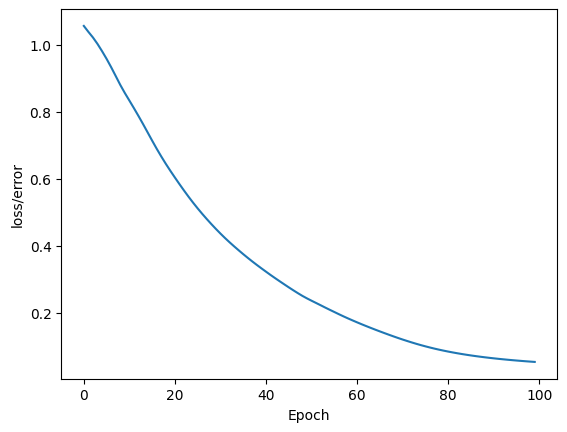

In [123]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [130]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propagataion
  y_eval = model.forward (X_test)    # X_test are features from our test set, y_eval wiil be predictions
  loss = criterion(y_eval, y_test)   # Fnd the loss or error

In [131]:
loss

tensor(0.1310)

In [138]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] ==0:
          species = 'setosa'
        elif y_test[i] ==1:
          species = 'versicolor'
        else:
          species = 'virginica'

        # Will tell us what type of flower calss our network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {species} \t {y_val.argmax().item()}')


        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct!')

1.) tensor([-6.8567,  2.8586,  5.6111]) 	 virginica 	 2
2.) tensor([-9.1149,  2.5784,  8.4036]) 	 virginica 	 2
3.) tensor([-9.6578,  3.1563,  8.5072]) 	 virginica 	 2
4.) tensor([-3.9088,  4.2499,  1.0393]) 	 versicolor 	 1
5.) tensor([-8.1278,  3.2391,  6.7060]) 	 virginica 	 2
6.) tensor([-2.4963,  4.2102, -0.6614]) 	 versicolor 	 1
7.) tensor([-6.4113,  3.4665,  4.5649]) 	 virginica 	 2
8.) tensor([-3.6832,  4.4967,  0.5640]) 	 versicolor 	 1
9.) tensor([-7.2220,  3.4107,  5.5299]) 	 virginica 	 2
10.) tensor([-9.5852,  2.7981,  8.7455]) 	 virginica 	 2
11.) tensor([-6.0816,  3.5761,  4.0947]) 	 virginica 	 2
12.) tensor([ 5.5921, -1.7813, -7.5210]) 	 setosa 	 0
13.) tensor([ 5.0484, -1.5209, -6.8213]) 	 setosa 	 0
14.) tensor([-1.5914,  3.4293, -1.0777]) 	 versicolor 	 1
15.) tensor([ 4.6471, -0.9551, -6.7350]) 	 setosa 	 0
16.) tensor([-5.8263,  3.5684,  3.8134]) 	 virginica 	 2
17.) tensor([ 4.9255, -1.3298, -6.8154]) 	 setosa 	 0
18.) tensor([-6.6090,  3.1329,  5.0862]) 	 versi

In [139]:
new_iris = torch.tensor([4.1, 3.7, 8.5, 1.2])

In [140]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([-11.3152,   0.2255,  12.5524])


In [143]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [144]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 5.4497, -1.7665, -7.2763])


In [148]:
# Save our NN Model
torch.save(model.state_dict(), 'Iris_Model.pt')

In [149]:
import os
print(os.listdir())

['.config', 'Iris_Model.pt', 'sample_data']


In [150]:
# Load the save Model
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))

<ipython-input-150-c20d3b0e65dc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('Iris_Model.pt'))


<All keys matched successfully>

In [151]:
# Make sure it loaded successfully
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)